In [1]:
#Import de librairies 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime
import plotly.graph_objects as go




In [8]:
dataset = pd.read_csv("top_1000_popular_movies_tmdb.csv", lineterminator='\n')
dataset.head()

Unnamed: 0      id                                title release_date  \
0           0  385687                               Fast X   2023-05-17   
1           1  603692                 John Wick: Chapter 4   2023-03-22   
2           2  502356          The Super Mario Bros. Movie   2023-04-05   
3           3  569094  Spider-Man: Across the Spider-Verse   2023-05-31   
4           4  536437                             Hypnotic   2023-05-11   

                                              genres original_language  \
0                    ['Action', 'Crime', 'Thriller']           English   
1                    ['Action', 'Thriller', 'Crime']           English   
2  ['Animation', 'Family', 'Adventure', 'Fantasy'...           English   
3  ['Action', 'Adventure', 'Animation', 'Science ...           English   
4         ['Mystery', 'Thriller', 'Science Fiction']           English   

   vote_average  vote_count  popularity  \
0           7.4        1347    8363.473   
1           7.9        2896    4210.313   
2           7.8        4628    3394.458   
3           8.8        1160    2859.047   
4           6.5         154    2654.854   

                                            overview     budget  \
0  Over many missions and against impossible odds...  340000000   
1  With the price on his head ever increasing, Jo...   90000000   
2  While working underground to fix a water main,...  100000000   
3  After reuniting with Gwen Stacy, Brooklyn’s fu...  100000000   
4  A detective becomes entangled in a mystery inv...   70000000   

                                production_companies     revenue  runtime  \
0  ['Universal Pictures', 'Original Film', 'One R...   652000000      142   
1  ['Thunder Road', '87Eleven', 'Summit Entertain...   431769198      170   
2  ['Universal Pictures', 'Illumination', 'Ninten...  1308766975       92   
3  ['Columbia Pictures', 'Sony Pictures Animation...   313522201      140   
4  ['Studio 8', 'Solstice Productions', 'Ingeniou...           0       94   

                                   tagline  
0              The end of the road begins.  
1                No way back, one way out.  
2                                      NaN  
3  It's how you wear the mask that matters  
4                  Control is an illusion.

In [4]:
dataset['id'].duplicated().sum()

0

In [5]:
dataset.shape

(10000, 15)

In [9]:
dataset.drop(['Unnamed: 0','id'], axis=1, inplace=True)
dataset.columns

Index(['title', 'release_date', 'genres', 'original_language', 'vote_average',
       'vote_count', 'popularity', 'overview', 'budget',
       'production_companies', 'revenue', 'runtime', 'tagline'],
      dtype='object')

In [10]:
dataset.head()

title release_date  \
0                               Fast X   2023-05-17   
1                 John Wick: Chapter 4   2023-03-22   
2          The Super Mario Bros. Movie   2023-04-05   
3  Spider-Man: Across the Spider-Verse   2023-05-31   
4                             Hypnotic   2023-05-11   

                                              genres original_language  \
0                    ['Action', 'Crime', 'Thriller']           English   
1                    ['Action', 'Thriller', 'Crime']           English   
2  ['Animation', 'Family', 'Adventure', 'Fantasy'...           English   
3  ['Action', 'Adventure', 'Animation', 'Science ...           English   
4         ['Mystery', 'Thriller', 'Science Fiction']           English   

   vote_average  vote_count  popularity  \
0           7.4        1347    8363.473   
1           7.9        2896    4210.313   
2           7.8        4628    3394.458   
3           8.8        1160    2859.047   
4           6.5         154    2654.854   

                                            overview     budget  \
0  Over many missions and against impossible odds...  340000000   
1  With the price on his head ever increasing, Jo...   90000000   
2  While working underground to fix a water main,...  100000000   
3  After reuniting with Gwen Stacy, Brooklyn’s fu...  100000000   
4  A detective becomes entangled in a mystery inv...   70000000   

                                production_companies     revenue  runtime  \
0  ['Universal Pictures', 'Original Film', 'One R...   652000000      142   
1  ['Thunder Road', '87Eleven', 'Summit Entertain...   431769198      170   
2  ['Universal Pictures', 'Illumination', 'Ninten...  1308766975       92   
3  ['Columbia Pictures', 'Sony Pictures Animation...   313522201      140   
4  ['Studio 8', 'Solstice Productions', 'Ingeniou...           0       94   

                                   tagline  
0              The end of the road begins.  
1                No way back, one way out.  
2                                      NaN  
3  It's how you wear the mask that matters  
4                  Control is an illusion.

In [11]:
#Checking for null values in DataFrame
dataset.isnull().sum()

title                      0
release_date              23
genres                     0
original_language          0
vote_average               0
vote_count                 0
popularity                 0
overview                  76
budget                     0
production_companies       0
revenue                    0
runtime                    0
tagline                 2617
dtype: int64

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 10000 non-null  object 
 1   release_date          9977 non-null   object 
 2   genres                10000 non-null  object 
 3   original_language     10000 non-null  object 
 4   vote_average          10000 non-null  float64
 5   vote_count            10000 non-null  int64  
 6   popularity            10000 non-null  float64
 7   overview              9924 non-null   object 
 8   budget                10000 non-null  int64  
 9   production_companies  10000 non-null  object 
 10  revenue               10000 non-null  int64  
 11  runtime               10000 non-null  int64  
 12  tagline               7383 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 1015.8+ KB


In [13]:
dataset.describe(include='all')

title release_date     genres original_language  \
count                  10000         9977      10000             10000   
unique                  9653         5995       2279                52   
top     The Three Musketeers   2023-06-11  ['Drama']           English   
freq                       5           32        582              7304   
mean                     NaN          NaN        NaN               NaN   
std                      NaN          NaN        NaN               NaN   
min                      NaN          NaN        NaN               NaN   
25%                      NaN          NaN        NaN               NaN   
50%                      NaN          NaN        NaN               NaN   
75%                      NaN          NaN        NaN               NaN   
max                      NaN          NaN        NaN               NaN   

        vote_average    vote_count    popularity              overview  \
count   10000.000000  10000.000000  10000.000000                  9924   
unique           NaN           NaN           NaN                  9920   
top              NaN           NaN           NaN  Nikkatsu Roman Porno   
freq             NaN           NaN           NaN                     3   
mean        6.319090   1558.294800     33.542340                   NaN   
std         1.460605   2887.861217    126.495621                   NaN   
min         0.000000      0.000000     12.297000                   NaN   
25%         5.900000    143.000000     14.599000                   NaN   
50%         6.600000    519.000000     18.582500                   NaN   
75%         7.100000   1584.000000     28.014500                   NaN   
max        10.000000  33822.000000   8363.473000                   NaN   

              budget production_companies       revenue       runtime  \
count   1.000000e+04                10000  1.000000e+04  10000.000000   
unique           NaN                 8036           NaN           NaN   
top              NaN                   []           NaN           NaN   
freq             NaN                  518           NaN           NaN   
mean    1.993600e+07                  NaN  6.083728e+07    100.817300   
std     3.870440e+07                  NaN  1.553007e+08     27.859468   
min     0.000000e+00                  NaN  0.000000e+00      0.000000   
25%     0.000000e+00                  NaN  0.000000e+00     90.000000   
50%     1.250000e+06                  NaN  2.128006e+06    100.000000   
75%     2.300000e+07                  NaN  5.105804e+07    115.000000   
max     4.600000e+08                  NaN  2.923706e+09    366.000000   

                       tagline  
count                     7383  
unique                    7328  
top     Based on a true story.  
freq                         6  
mean                       NaN  
std                        NaN  
min                        NaN  
25%                        NaN  
50%                        NaN  
75%                        NaN  
max                        NaN

In [14]:
#vérification de doublons 
dataset.duplicated().sum()

0

In [15]:
dataset['title'].nunique()

9653

In [16]:
dataset['title'].duplicated().sum()

347

In [17]:
#lignes avec les memes titres 
dataset[dataset['title'].isin(dataset['title'][dataset['title'].duplicated()])].sort_values('title')

title release_date  \
1856               12 Angry Men   1957-04-10   
8800               12 Angry Men   1997-08-17   
2698  A Nightmare on Elm Street   2010-04-30   
1646  A Nightmare on Elm Street   1984-11-09   
7833                  Abduction   2019-03-20   
...                         ...          ...   
8272          Wuthering Heights   1992-10-16   
4879                          X   2011-11-23   
262                           X   2022-03-17   
1657                 Young Aunt   2018-05-31   
4583                 Young Aunt   2019-05-14   

                                                 genres original_language  \
1856                                          ['Drama']           English   
8800                     ['Crime', 'Drama', 'TV Movie']           English   
2698                  ['Horror', 'Mystery', 'Thriller']           English   
1646                                         ['Horror']           English   
7833  ['Horror', 'Science Fiction', 'Thriller', 'Act...           English   
...                                                 ...               ...   
8272                               ['Drama', 'Romance']           English   
4879                  ['Action', 'Thriller', 'Romance']           English   
262                   ['Horror', 'Mystery', 'Thriller']           English   
1657                                        ['Romance']            Korean   
4583                                        ['Romance']            Korean   

      vote_average  vote_count  popularity  \
1856           8.5        7334      33.371   
8800           7.7         262      13.292   
2698           5.5        2425      26.772   
1646           7.3        4477      35.948   
7833           6.1          79      14.260   
...            ...         ...         ...   
8272           6.7         239      13.803   
4879           6.5         223      18.834   
262            6.8        1991     115.740   
1657           4.7           3      35.816   
4583          10.0           1      19.528   

                                               overview    budget  \
1856  The defense and the prosecution have rested an...    350000   
8800  During the trial of a man accused of his fathe...   1750000   
2698  The film that brings back horror icon Freddy K...  35000000   
1646  Teenagers in a small town are dropping like fl...   1100000   
7833  A man steps out of a park fountain in Ho Chi M...         0   
...                                                 ...       ...   
8272  Young orphan Heathcliff is adopted by the weal...         0   
4879  A veteran call girl and a runaway prostitute w...         0   
262   A group of actors sets out to make an adult fi...  10000000   
1657  Jung-hoon manages to get into a university in ...         0   
4583  In an ordinary-looking house, live the owner c...         0   

                                   production_companies    revenue  runtime  \
1856       ['United Artists', 'Orion-Nova Productions']    1000000       97   
8800                                 ['MGM Television']          0      117   
2698  ['Platinum Dunes', 'New Line Cinema', 'Warner ...  115664037       95   
1646  ['New Line Cinema', 'Smart Egg Pictures', 'Med...   57000000       91   
7833                     ['Red Sea Media', 'Ace Films']          0       98   
...                                                 ...        ...      ...   
8272                                      ['Paramount']          0      105   
4879                     ['Rough Beast', 'Circe Films']          0       90   
262                  ['A24', 'Little Lamb Productions']   14779858      106   
1657                                                 []          0       80   
4583                                                 []          0       70   

                                                tagline  
1856   Life is in their hands. Death is on their minds.  
8800                                                NaN  
2698               

In [18]:
dataset['genres'].unique()

array(["['Action', 'Crime', 'Thriller']",
       "['Action', 'Thriller', 'Crime']",
       "['Animation', 'Family', 'Adventure', 'Fantasy', 'Comedy']", ...,
       "['Fantasy', 'Thriller']",
       "['Action', 'Adventure', 'Comedy', 'History', 'Fantasy']",
       "['Crime', 'Drama', 'History', 'Romance']"], dtype=object)

In [19]:
dataset['genres'].nunique()

2279

In [20]:
dataset[dataset['genres'].str.len() <= 2]

title release_date genres  \
649                         Gabriel's Inferno: Part IV   2022-03-30     []   
1072                                  Alienoid: Part 2          NaN     []   
1481                                      Snake Beauty   1994-03-26     []   
2094                                Oppressive Torture   1978-01-14     []   
2185                   Za gyakutai: Nyotai ikedori-hen   1987-07-18     []   
...                                                ...          ...    ...   
8614                                   One More Chance   2023-06-21     []   
8991                              Freedom Is Beautiful   2023-06-11     []   
9308                Koichiro Uno's Caressing the Peach   1985-04-06     []   
9684  The Witcher Season One Recap: From the Beginning   2021-12-17     []   
9768                       All About the Little Things   2023-06-15     []   

     original_language  vote_average  vote_count  popularity  \
649            English           5.0           2      64.957   
1072            Korean           0.0           0      47.439   
1481           Chinese           0.0           0      38.307   
2094          Japanese           4.7           3      31.184   
2185          Japanese           6.5           1      30.352   
...                ...           ...         ...         ...   
8614                cn           0.0           0      13.465   
8991           English           0.0           0      13.122   
9308          Japanese           7.0           1      12.858   
9684           English           5.7           9      12.548   
9768             Czech           0.0           0      12.476   

                                               overview  budget  \
649                                                 NaN       0   
1072                                                NaN       0   
1481  Some female ghosts seduce and kill trespassers...       0   
2094  In the end of the 19th century, social restora...       0   
2185                                                NaN       0   
...                                                 ...     ...   
8614  Fai, a compulsive gambler and an irresponsible...       0   
8991  Farhad Bandesh and Mostafa Azimitibar were fin...       0   
9308                               Nikkatsu Roman Porno       0   
9684  From Yennefer's magical origins to Geralt's fi...       0   
9768  The film takes place in one house, at an unspe...       0   

                      production_companies  revenue  runtime  \
649                                     []        0        0   
1072                        ['Caper Film']        0        0   
1481      ['Ka Shing Film Production Co.']        0       88   
2094              ['Wakamatsu Production']        0       61   
2185                         ['Orient 21']        0       64   
...                                    ...      ...      ...   
8614                                    []        0        0   
8991                                    []        0       67   
9308              ['Nikkatsu Corporation']        0       62   
9684                                    []        0       15   
9768  ['DNA Production', 'DNA Production']        0        0   

                                                tagline  
649                                                 NaN  
1072                                                NaN  
1481                                                NaN  
2094                                                NaN  
2185                                                NaN  
...                                                 ...  
8614                                                NaN  
8991  Two remarkable Kurdish Iranian asylum seekers,...  
9308                                                NaN  
9684                                                NaN  
9768                                                NaN  

[63 rows x 13 columns]

In [21]:
len(dataset[dataset['genres'].str.len() <= 2])

63

In [22]:
dataset['original_language'].unique()

array(['English', 'Spanish', 'Finnish', 'Polish', 'German', 'Korean',
       'Chinese', 'Japanese', 'French', 'Dutch', 'Portuguese', 'Italian',
       'Danish', 'Tagalog', 'Ukrainian', 'Russian', 'Norwegian',
       'Romanian', 'Tamil', 'Swedish', 'Telugu', 'Icelandic', 'Turkish',
       'Basque', 'cn', 'Indonesian', 'Thai', 'Macedonian', 'Arabic',
       'Serbian', 'Hindi', 'sh', 'Vietnamese', 'Bulgarian', 'Galician',
       'Greek', 'Lao', 'Persian', 'Catalan', 'xx', 'Czech', 'Malayalam',
       'Irish', 'Hebrew', 'Oriya', 'Kannada', 'Bosnian',
       'Norwegian Bokmal', 'Haitian', 'Khmer', 'Hungarian', 'Dzongkha'],
      dtype=object)

In [24]:
dataset['original_language'].nunique()

52

In [25]:
#convertir la colonne release_date en format date
dataset["release_date"] = pd.to_datetime(dataset["release_date"])

#création d'une nouvelle variable retenant l'année 
dataset["release_year"] = dataset["release_date"].dt.year

#suppression de la colonne release_date
#dataset.drop(columns=["release_date"], inplace=True)
dataset.head()

title release_date  \
0                               Fast X   2023-05-17   
1                 John Wick: Chapter 4   2023-03-22   
2          The Super Mario Bros. Movie   2023-04-05   
3  Spider-Man: Across the Spider-Verse   2023-05-31   
4                             Hypnotic   2023-05-11   

                                              genres original_language  \
0                    ['Action', 'Crime', 'Thriller']           English   
1                    ['Action', 'Thriller', 'Crime']           English   
2  ['Animation', 'Family', 'Adventure', 'Fantasy'...           English   
3  ['Action', 'Adventure', 'Animation', 'Science ...           English   
4         ['Mystery', 'Thriller', 'Science Fiction']           English   

   vote_average  vote_count  popularity  \
0           7.4        1347    8363.473   
1           7.9        2896    4210.313   
2           7.8        4628    3394.458   
3           8.8        1160    2859.047   
4           6.5         154    2654.854   

                                            overview     budget  \
0  Over many missions and against impossible odds...  340000000   
1  With the price on his head ever increasing, Jo...   90000000   
2  While working underground to fix a water main,...  100000000   
3  After reuniting with Gwen Stacy, Brooklyn’s fu...  100000000   
4  A detective becomes entangled in a mystery inv...   70000000   

                                production_companies     revenue  runtime  \
0  ['Universal Pictures', 'Original Film', 'One R...   652000000      142   
1  ['Thunder Road', '87Eleven', 'Summit Entertain...   431769198      170   
2  ['Universal Pictures', 'Illumination', 'Ninten...  1308766975       92   
3  ['Columbia Pictures', 'Sony Pictures Animation...   313522201      140   
4  ['Studio 8', 'Solstice Productions', 'Ingeniou...           0       94   

                                   tagline  release_year  
0              The end of the road begins.        2023.0  
1                No way back, one way out.        2023.0  
2                                      NaN        2023.0  
3  It's how you wear the mask that matters        2023.0  
4                  Control is an illusion.        2023.0

In [26]:
#créer une varibale regroupant les 3 variables genres, overview et tagline
dataset["target"] = dataset["genres"] + " " + dataset["overview"] + " " + dataset["tagline"]

In [27]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in dataset.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['vote_average', 'vote_count', 'popularity', 'budget', 'revenue', 'runtime', 'release_year']
Found categorical features  ['title', 'release_date', 'genres', 'original_language', 'overview', 'production_companies', 'tagline', 'target']


In [28]:

fig = go.Figure()
# Use x instead of y argument forhorizontal plot
fig.add_trace(go.Box(y=dataset['vote_average'],name="vote_average"))
fig.add_trace(go.Box(y=dataset['vote_count'],name="vote_count"))
fig.add_trace(go.Box(y=dataset['popularity'],name="popularity"))
fig.add_trace(go.Box(y=dataset['budget'],name="budget"))
fig.add_trace(go.Box(y=dataset['revenue'],name="revenue"))
fig.add_trace(go.Box(y=dataset['runtime'],name="runtime"))


fig.show()

In [29]:
data_num = dataset.select_dtypes(include=['float64', 'int64'])  # Sélectionne les colonnes numériques
data_num = pd.DataFrame(data_num)
data_num.head()

vote_average  vote_count  popularity     budget     revenue  runtime  \
0           7.4        1347    8363.473  340000000   652000000      142   
1           7.9        2896    4210.313   90000000   431769198      170   
2           7.8        4628    3394.458  100000000  1308766975       92   
3           8.8        1160    2859.047  100000000   313522201      140   
4           6.5         154    2654.854   70000000           0       94   

   release_year  
0        2023.0  
1        2023.0  
2        2023.0  
3        2023.0  
4        2023.0

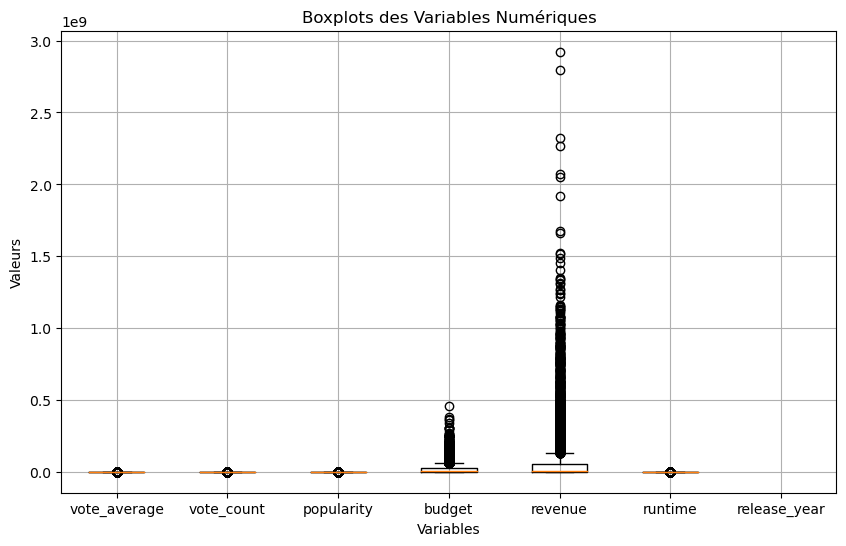

In [30]:
# Création du graphique
plt.figure(figsize=(10, 6))
plt.boxplot(data_num.values, labels=data_num.columns)
plt.title('Boxplots des Variables Numériques')
plt.ylabel('Valeurs')
plt.xlabel('Variables')
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='vote_average'>

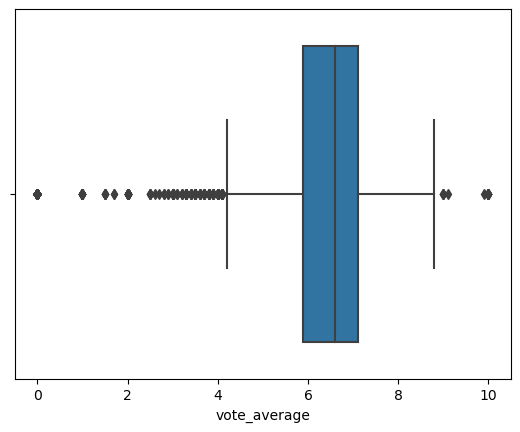

In [31]:
sns.boxplot(data=dataset, x='vote_average',orient='h')

<AxesSubplot:xlabel='vote_count'>

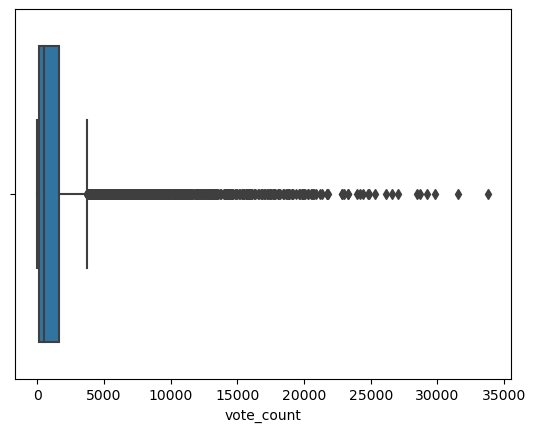

In [32]:
sns.boxplot(data=dataset, x='vote_count',orient='h')

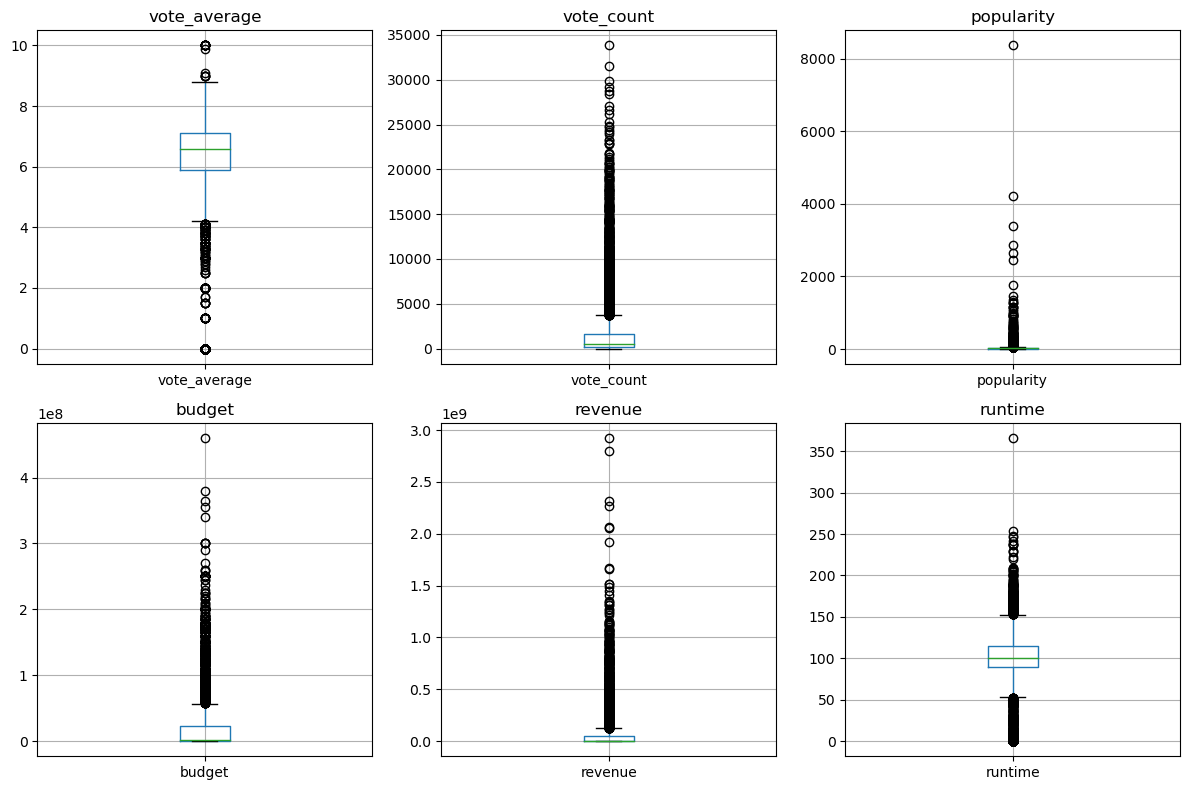

In [33]:
# Créer une figure avec 2x3 sous-graphiques
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Noms des données pour l'étiquetage
data_names = data_num.columns

# Créer les boxplots pour chaque sous-graphique
for i, ax in enumerate(axes.flatten()):
    data_num.boxplot(column=data_names[i], ax=ax)
    ax.set_title(data_names[i])
    ax.grid(True)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

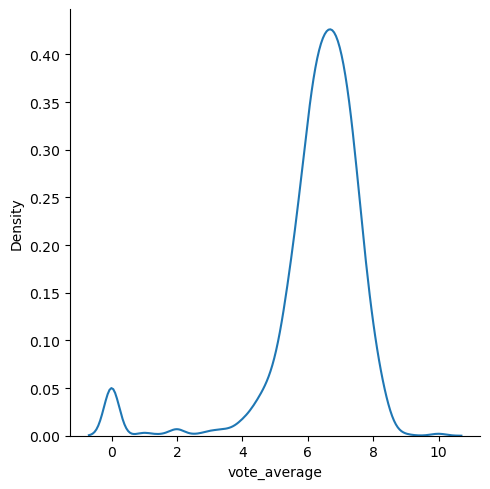

In [34]:
sns.displot(dataset['vote_average'], kind='kde')

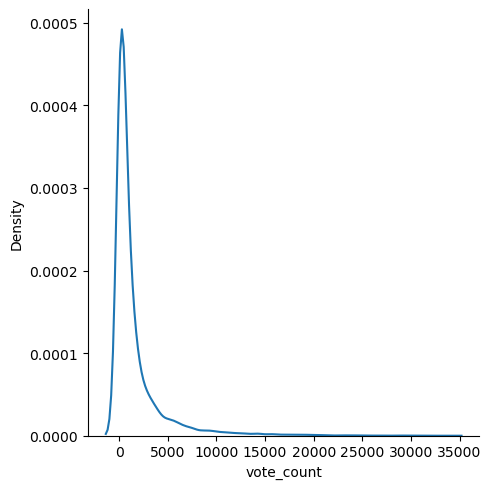

In [35]:
sns.displot(dataset['vote_count'], kind='kde')

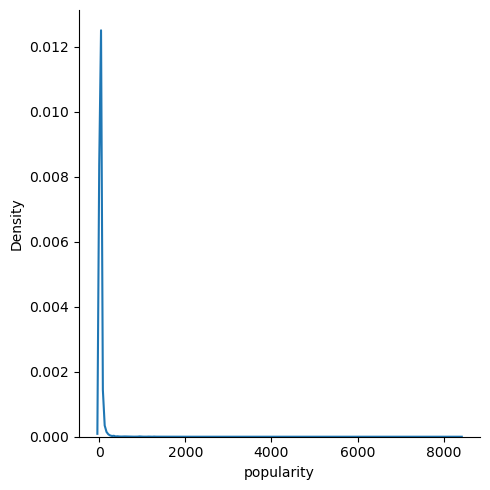

In [36]:
sns.displot(dataset['popularity'], kind='kde')

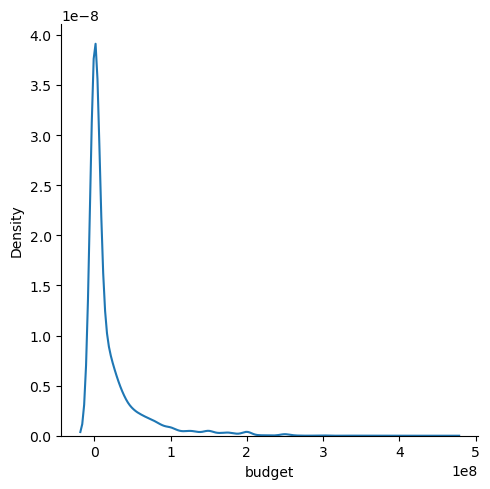

In [37]:
sns.displot(dataset['budget'], kind='kde')

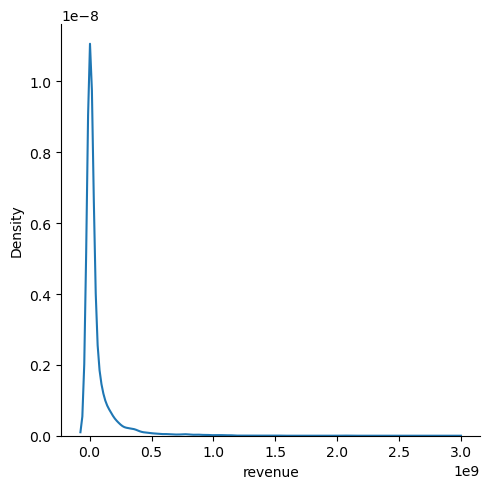

In [38]:
sns.displot(dataset['revenue'], kind='kde')

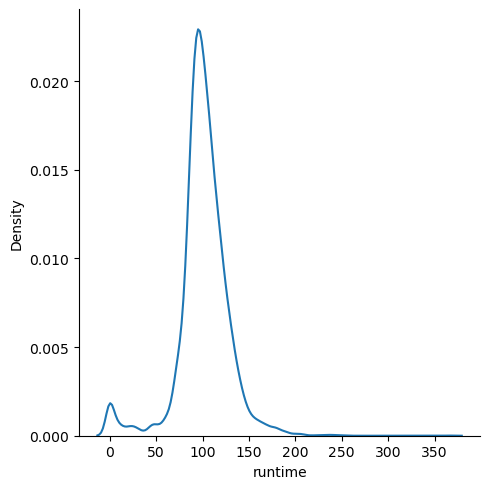

In [39]:
sns.displot(dataset['runtime'], kind='kde')

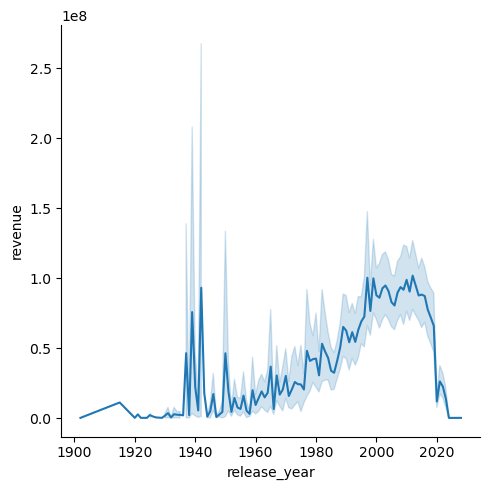

In [40]:
sns.relplot(x='release_year', y='revenue', kind='line', data=dataset)

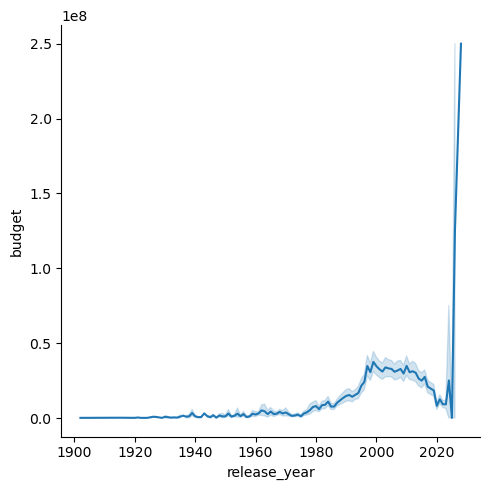

In [41]:
sns.relplot(x='release_year', y='budget', kind='line', data=dataset)

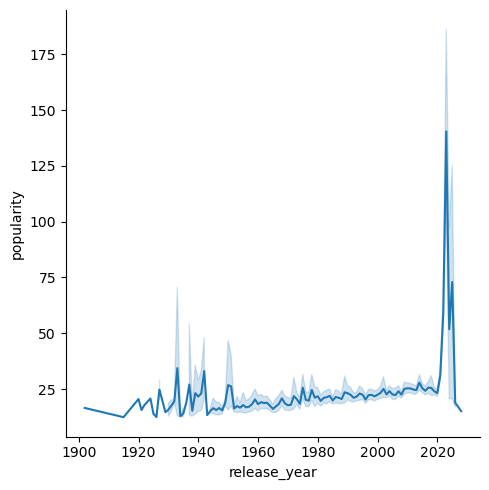

In [42]:
sns.relplot(x='release_year', y='popularity', kind='line', data=dataset)

In [43]:
avg_pop = dataset.groupby('release_year')['popularity'].mean()

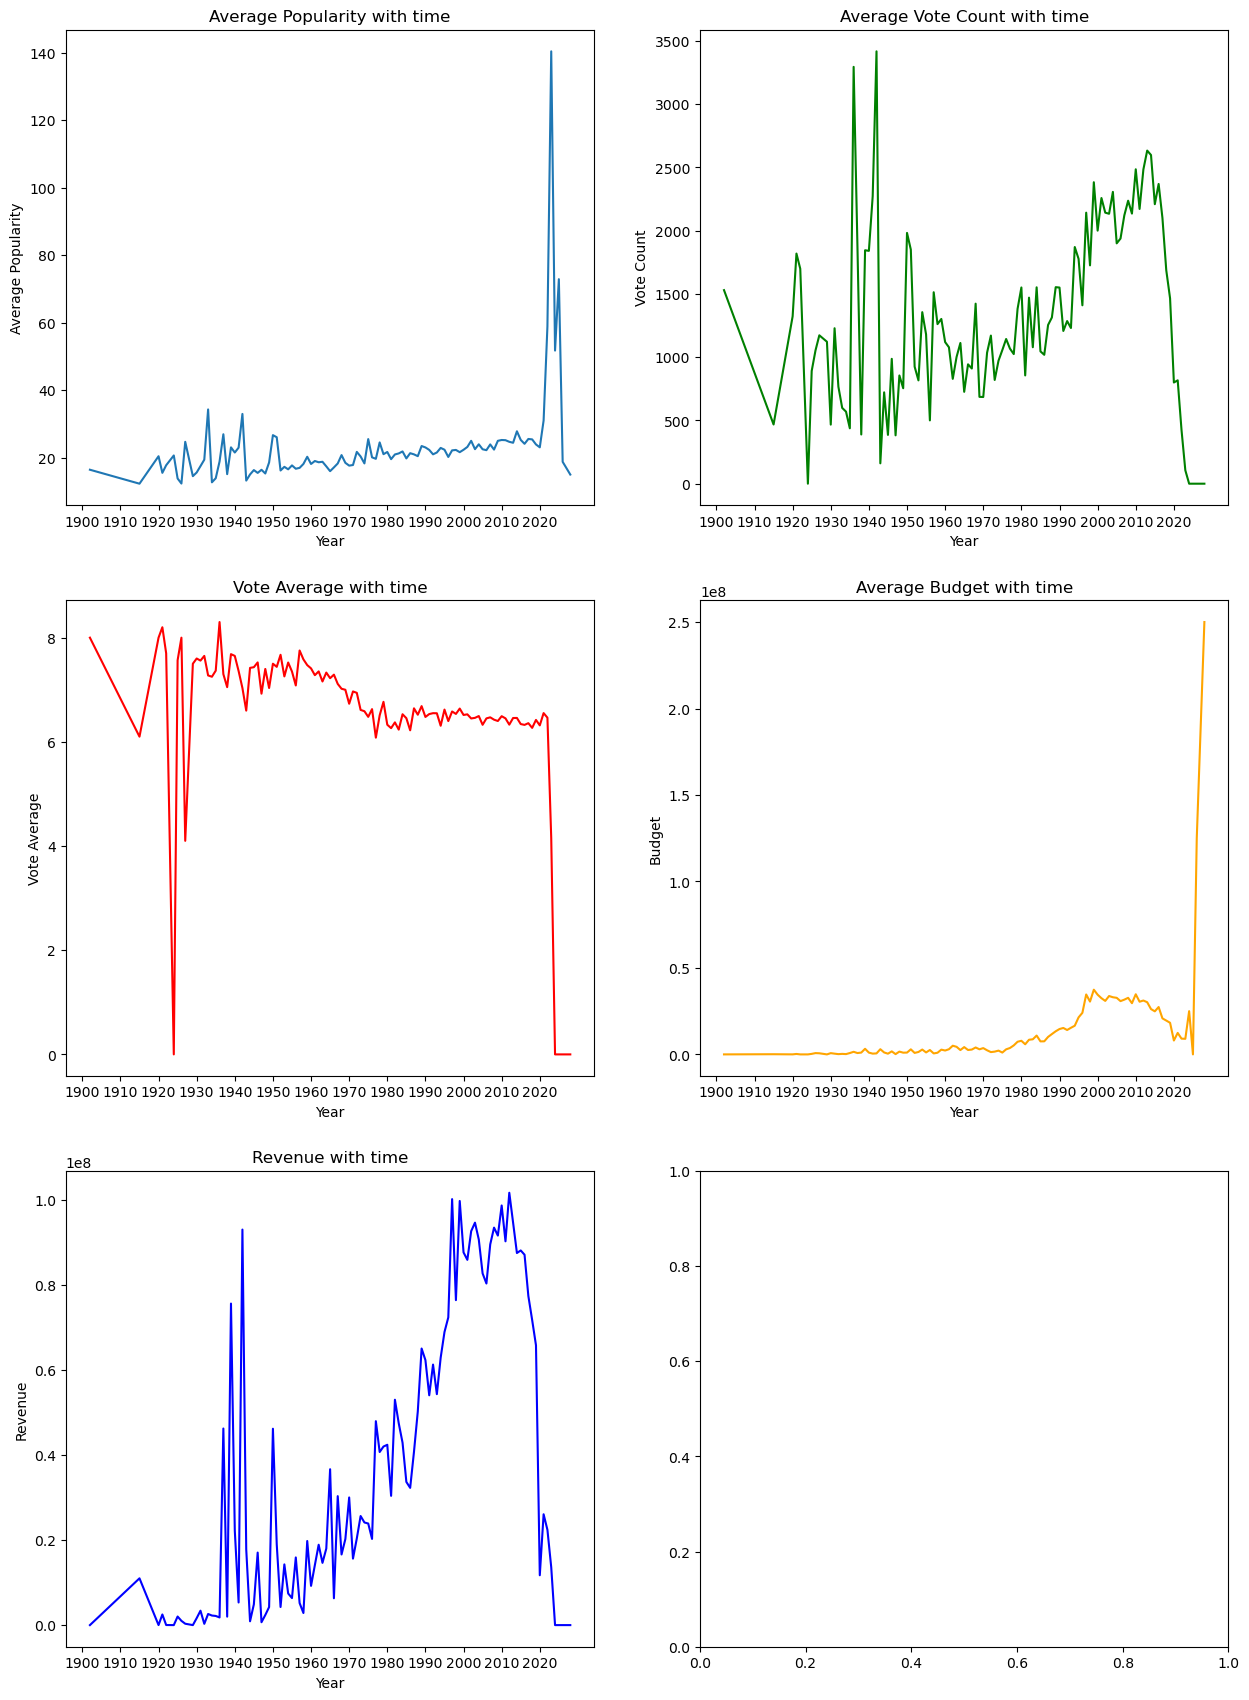

In [44]:
fig, axs = plt.subplots(3,2,figsize=(15,21))

axs[0,0].plot(avg_pop.index, avg_pop.values)
axs[0,0].set_title('Average Popularity with time')
axs[0,0].set_xlabel('Year')
axs[0,0].set_ylabel('Average Popularity')
axs[0,0].set_xticks(np.arange(1900, 2030, step=10),rotation=45)

axs[0,1].plot(dataset.groupby('release_year')['vote_count'].mean(),color='green')
axs[0,1].set_title('Average Vote Count with time')
axs[0,1].set_xlabel('Year')
axs[0,1].set_ylabel('Vote Count')
axs[0,1].set_xticks(np.arange(1900, 2030, step=10),rotation=45)

axs[1,0].plot(dataset.groupby('release_year')['vote_average'].mean(),color='red')
axs[1,0].set_title('Vote Average with time')
axs[1,0].set_xlabel('Year')
axs[1,0].set_ylabel('Vote Average')
axs[1,0].set_xticks(np.arange(1900, 2030, step=10),rotation=45)

axs[1,1].plot(dataset.groupby('release_year')['budget'].mean(), color='orange')
axs[1,1].set_title('Average Budget with time')
axs[1,1].set_xlabel('Year')
axs[1,1].set_ylabel('Budget')
axs[1,1].set_xticks(np.arange(1900, 2030, step=10),rotation=45)

axs[2,0].plot(dataset.groupby('release_year')['revenue'].mean(),color='blue')
axs[2,0].set_title('Revenue with time')
axs[2,0].set_xlabel('Year')
axs[2,0].set_ylabel('Revenue')
axs[2,0].set_xticks(np.arange(1900, 2030, step=10),rotation=45)


plt.show()

In [45]:
# Correlation matrix
corr_matrix = dataset.corr().round(2)

import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())


fig.show()

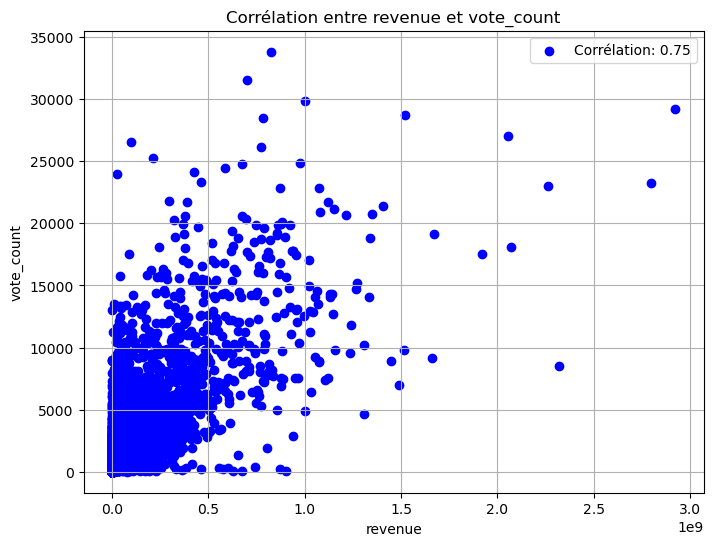

In [46]:
# Calculer la corrélation entre les deux variables
correlation = dataset["revenue"].corr(dataset["vote_count"])

# Créer un scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(dataset["revenue"], dataset["vote_count"], color='b', label=f'Corrélation: {correlation:.2f}')
plt.title("Corrélation entre revenue et vote_count")
plt.xlabel("revenue")
plt.ylabel("vote_count")
plt.legend()
plt.grid(True)
plt.show()

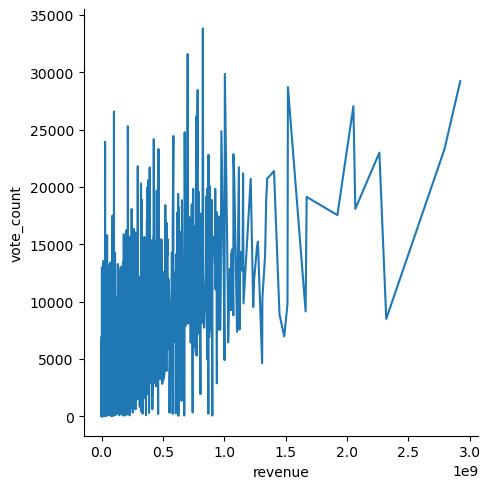

In [47]:
sns.relplot(x='revenue', y='vote_count', kind='line', data=dataset)

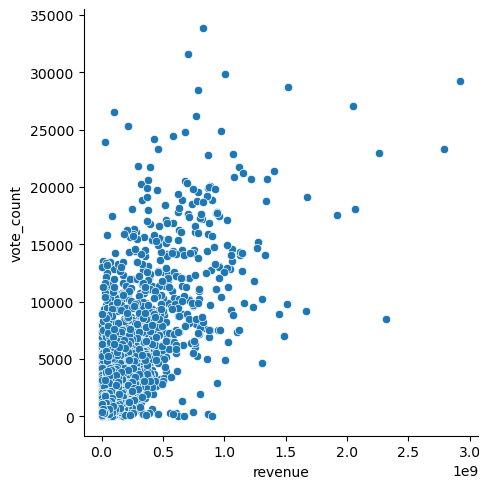

In [48]:
# Scatterplot
sns.relplot(x = 'revenue' , y = 'vote_count' , data = dataset)

<Figure size 1000x600 with 0 Axes>

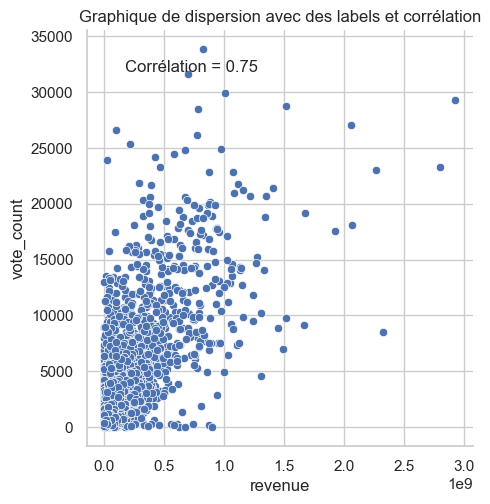

In [49]:
# Calculer la corrélation entre les deux variables
correlation = dataset["revenue"].corr(dataset["vote_count"])


plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.relplot(x = 'revenue' , y = 'vote_count' , data = dataset)

# Ajouter la valeur de corrélation au graphique
plt.text(0.1, 0.9, f"Corrélation = {correlation:.2f}", transform=plt.gca().transAxes)
plt.title("Graphique de dispersion avec des labels et corrélation")
plt.show()

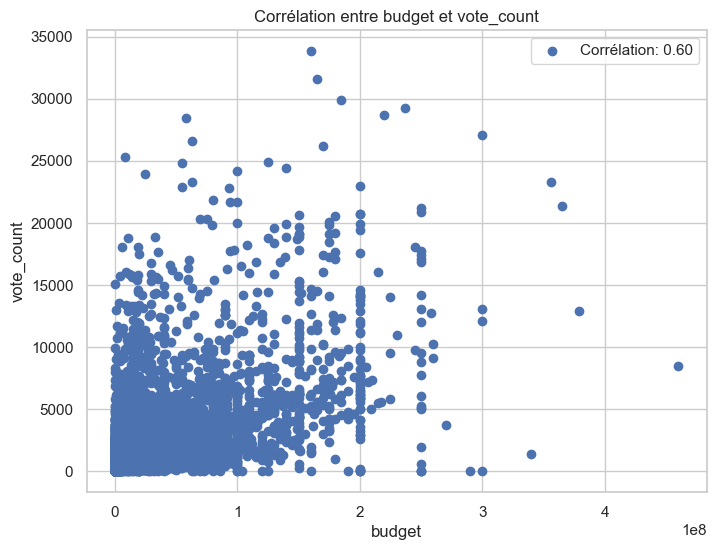

In [50]:
# Calculer la corrélation entre les deux variables
correlation = dataset["budget"].corr(dataset["vote_count"])

# Créer un scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(dataset["budget"], dataset["vote_count"], color='b', label=f'Corrélation: {correlation:.2f}')
plt.title("Corrélation entre budget et vote_count")
plt.xlabel("budget")
plt.ylabel("vote_count")
plt.legend()
plt.grid(True)
plt.show()

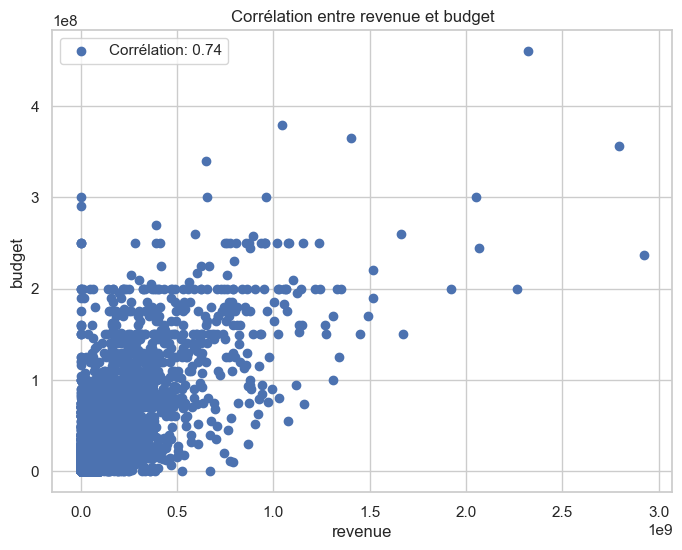

In [51]:
# Calculer la corrélation entre les deux variables
correlation = dataset["revenue"].corr(dataset["budget"])

# Créer un scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(dataset["revenue"], dataset["budget"], color='b', label=f'Corrélation: {correlation:.2f}')
plt.title("Corrélation entre revenue et budget")
plt.xlabel("revenue")
plt.ylabel("budget")
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# finding which genre has the most movies

genre_count = dataset['genres'].explode().value_counts()
most_common_genre = genre_count.idxmax()
most_common_genre = most_common_genre.strip("['']")

print(f'{most_common_genre} is the most common movie genre.')

Drama is the most common movie genre.


In [53]:
# finding which production company has made the most movies

prod_company_counts = dataset['production_companies'].explode().value_counts()
prod_company_counts = prod_company_counts.drop('[]')
most_common_prod_company = prod_company_counts.idxmax()
most_common_prod_company = most_common_prod_company.strip("['']")

most_common_prod_company_movies = prod_company_counts.max()

print(f'{most_common_prod_company} is the company that has produced the most movies, with {most_common_prod_company_movies} completed movies.')

Paramount is the company that has produced the most movies, with 62 completed movies.


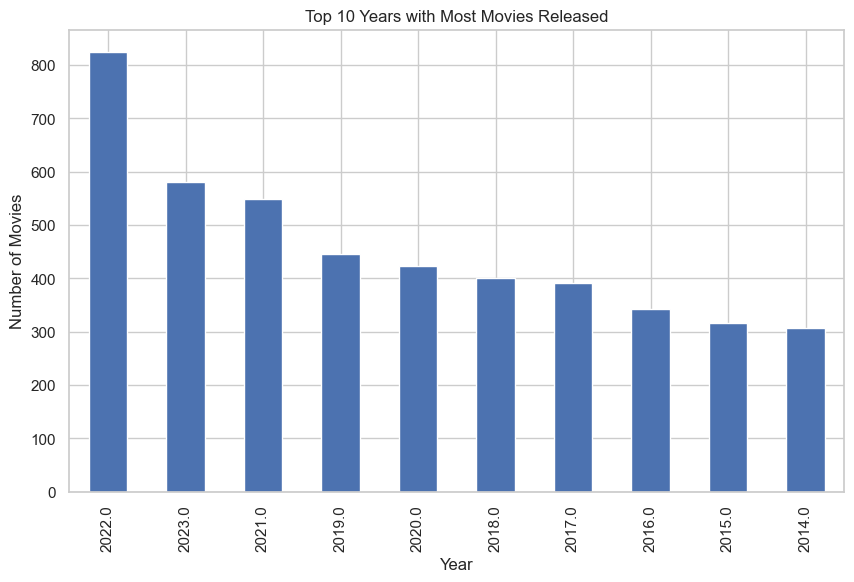

In [54]:
# finding top 10 years with most movies released

#dataset['release_year'] = pd.to_datetime(df['release_date']).dt.year
year_counts = dataset['release_year'].value_counts().head(10)

plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Top 10 Years with Most Movies Released')
plt.show()

In [55]:
# Supposons que df soit votre DataFrame
original_language_counts = dataset['original_language'].value_counts()
total_values = len(dataset)

# Calcul des proportions
original_langage_proportions = original_language_counts / total_values*100

# Affichage des proportions
print(original_langage_proportions)

English             73.04
Japanese             6.63
Korean               3.97
French               3.34
Spanish              2.98
cn                   1.55
Chinese              1.54
Italian              1.51
German               0.88
Russian              0.71
Portuguese           0.49
Tagalog              0.48
Hindi                0.33
Norwegian            0.29
Swedish              0.27
Danish               0.26
Dutch                0.23
Thai                 0.22
Polish               0.21
Turkish              0.20
Indonesian           0.11
Finnish              0.08
Tamil                0.07
Telugu               0.07
Arabic               0.06
Greek                0.06
Ukrainian            0.04
Vietnamese           0.03
Basque               0.03
Czech                0.03
Persian              0.03
Romanian             0.03
Galician             0.02
Icelandic            0.02
Serbian              0.02
Khmer                0.01
Hebrew               0.01
Hungarian            0.01
Haitian     

In [56]:
genres_col = dataset['genres']
# Empty set to store unique genres
unique_genres = set()
# Iterate over each row in the genres column
for genres_list in genres_col:
    genres = eval(genres_list)  # Convert the string representation of list to a list
    unique_genres.update(genres)  # Add the genres to the set
    
len(unique_genres)

19

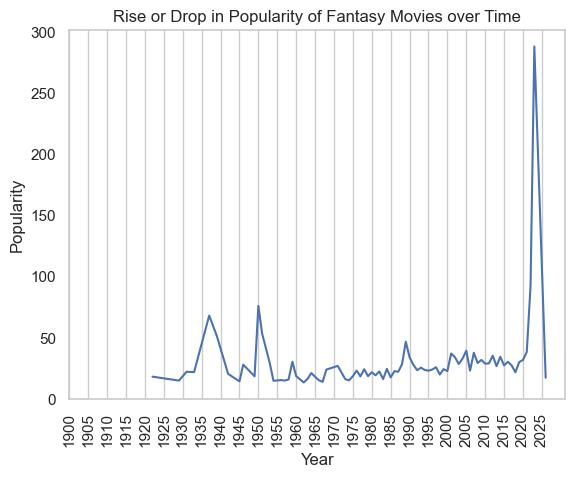

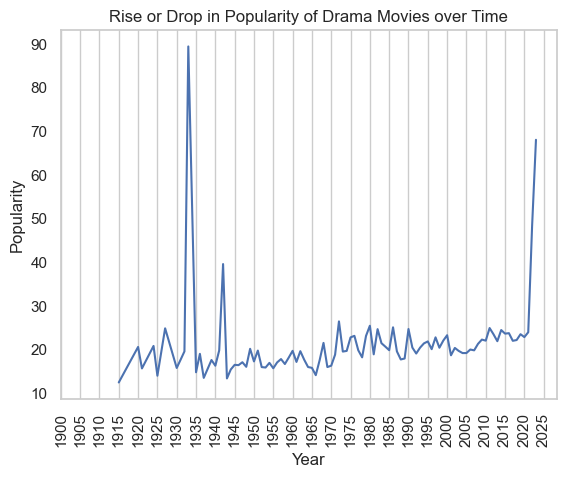

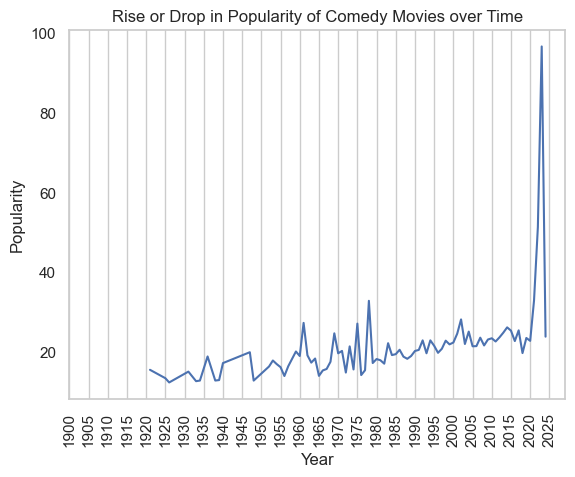

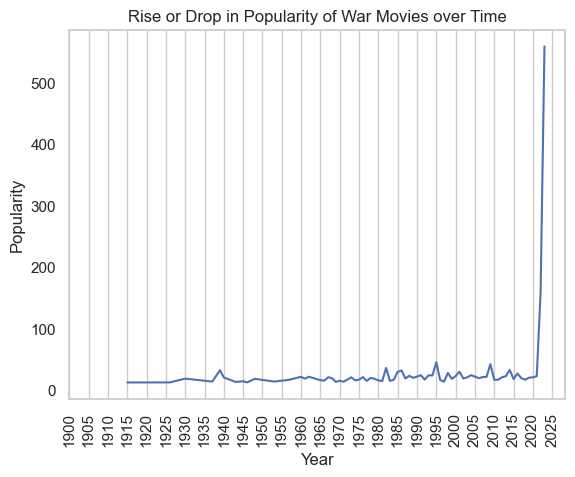

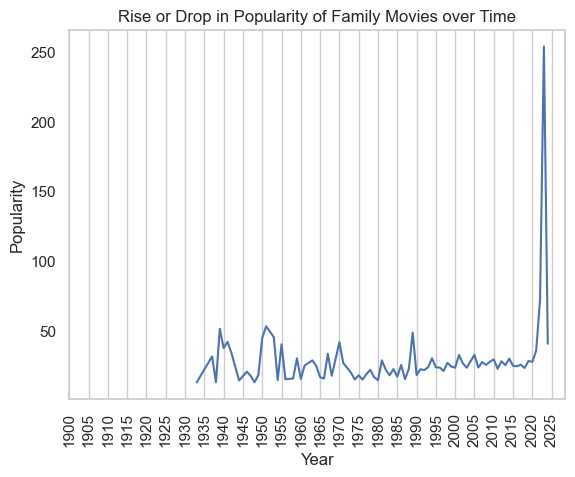

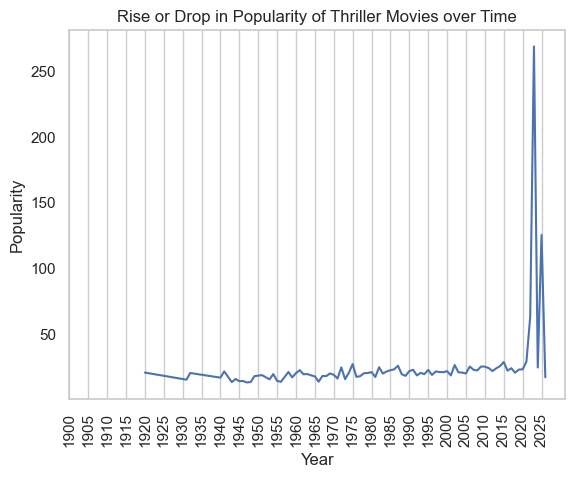

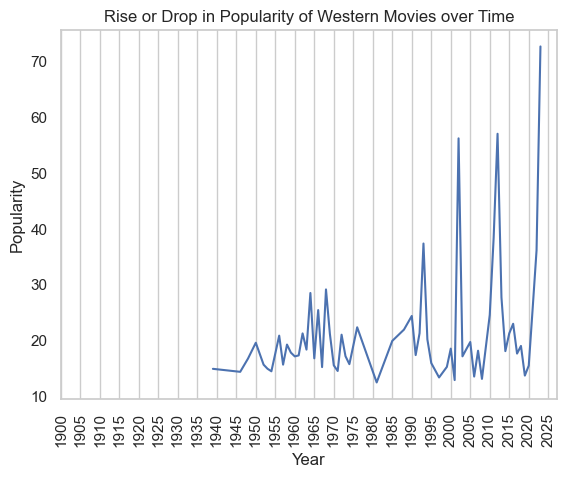

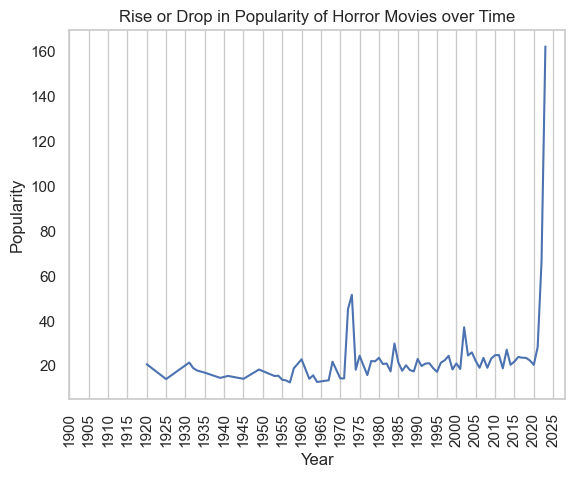

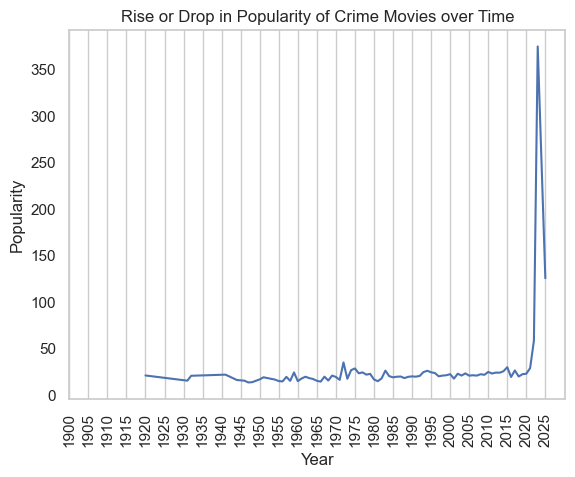

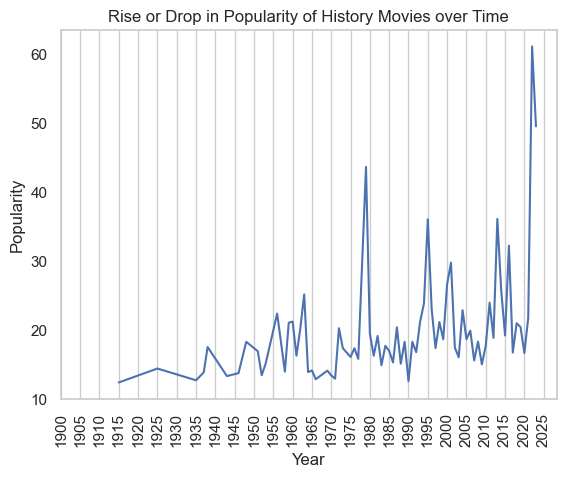

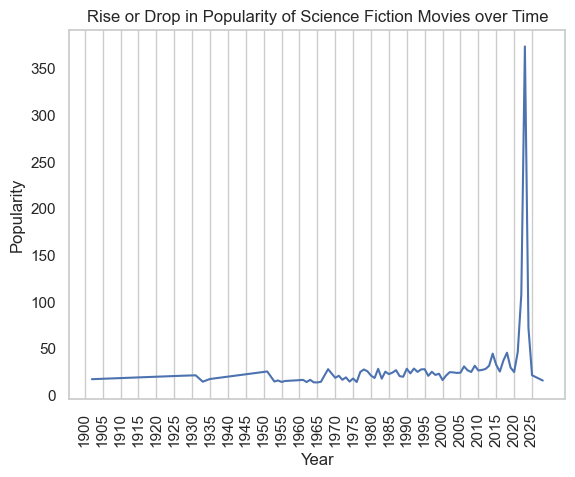

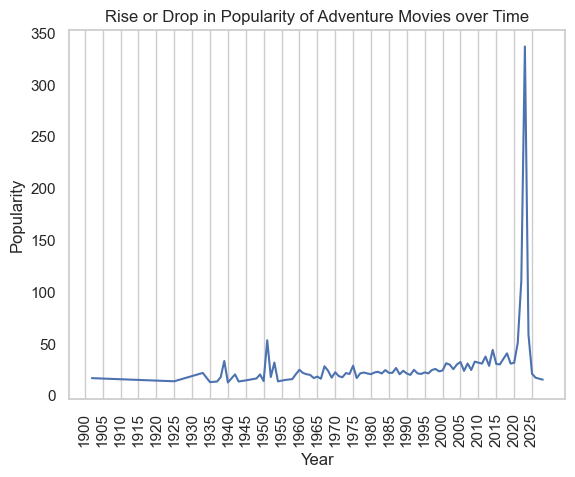

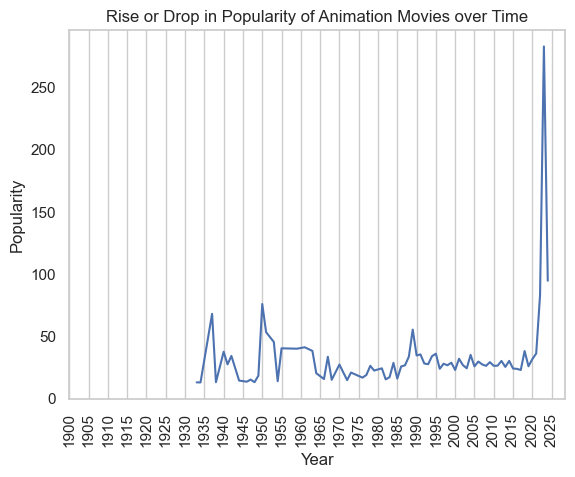

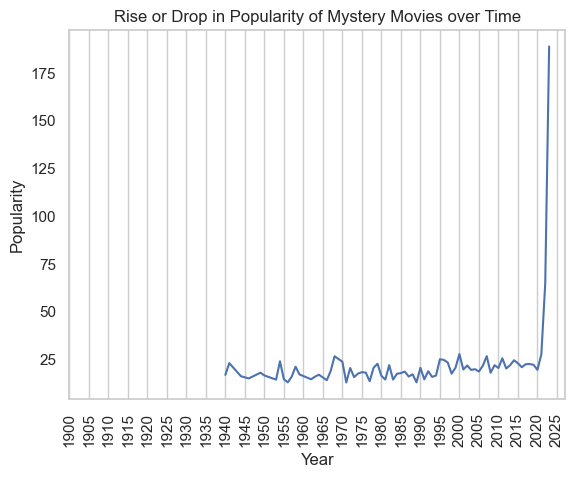

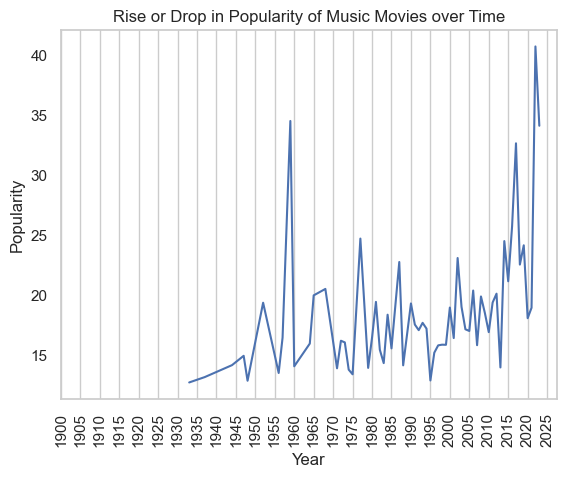

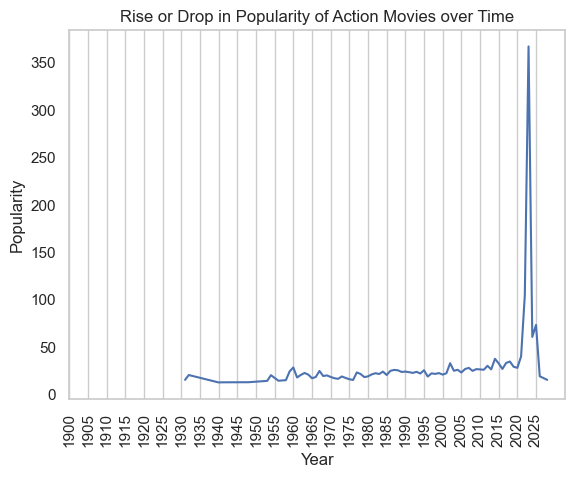

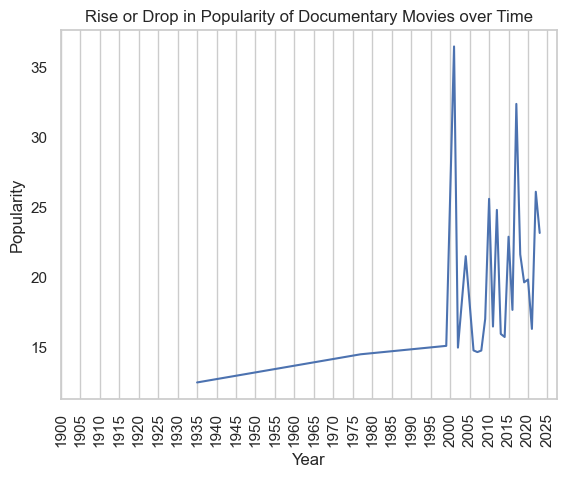

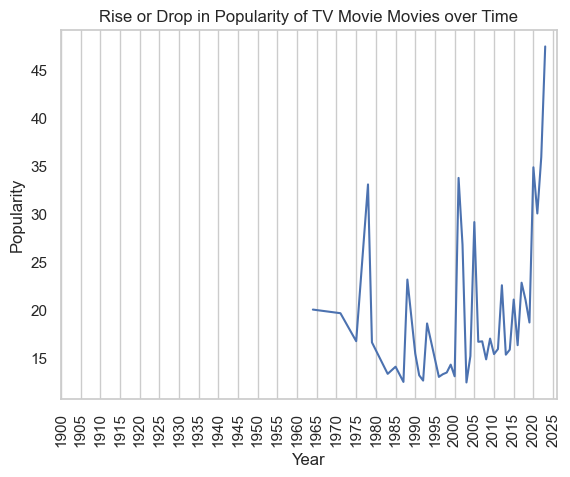

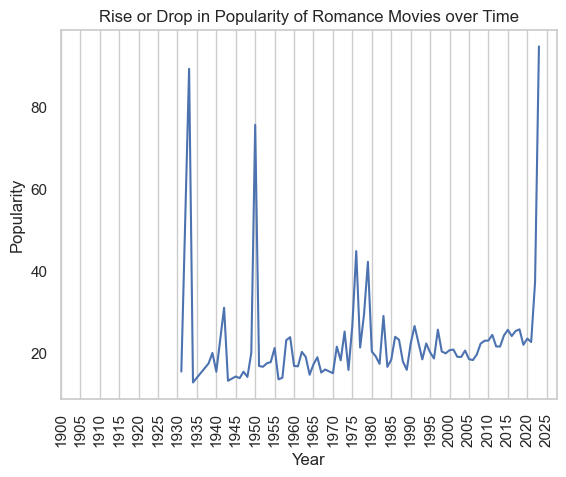

In [57]:
for genre in unique_genres:
    movies = dataset[dataset['genres'].str.contains(genre)]
    avg_popularity = movies.groupby('release_year')['popularity'].mean()
    plt.plot(avg_popularity.index, avg_popularity.values)
    plt.title('Rise or Drop in Popularity of '+str(genre)+' Movies over Time')
    plt.xlabel('Year')
    plt.ylabel('Popularity')
    plt.xticks(np.arange(1900, 2030, step=5),rotation=90)
    plt.grid(axis='y')
    plt.show()

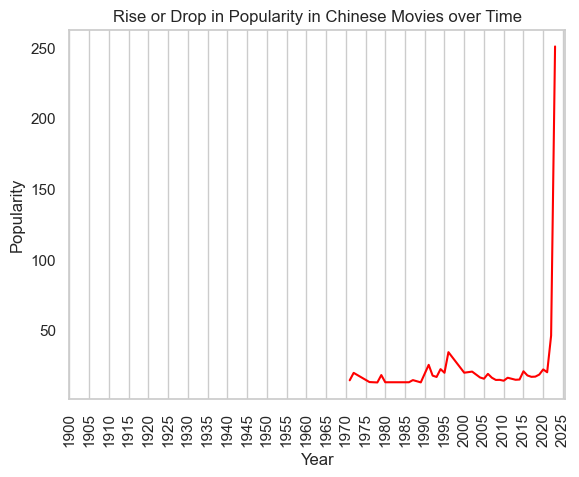

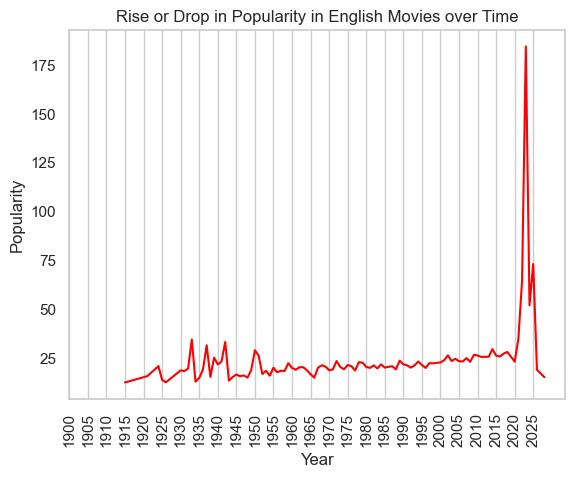

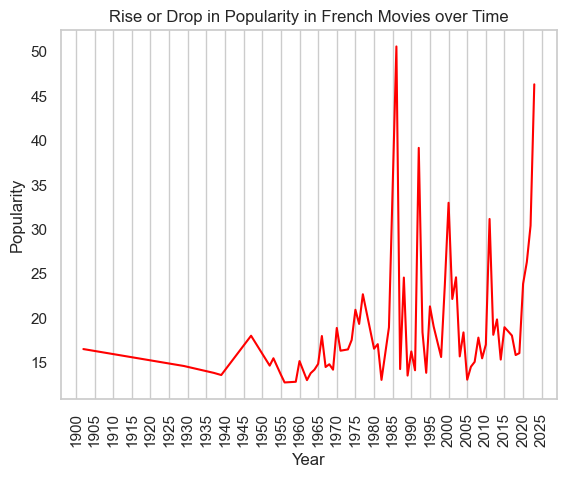

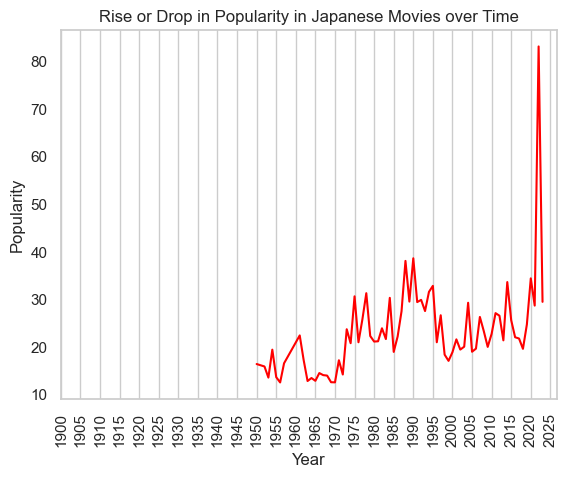

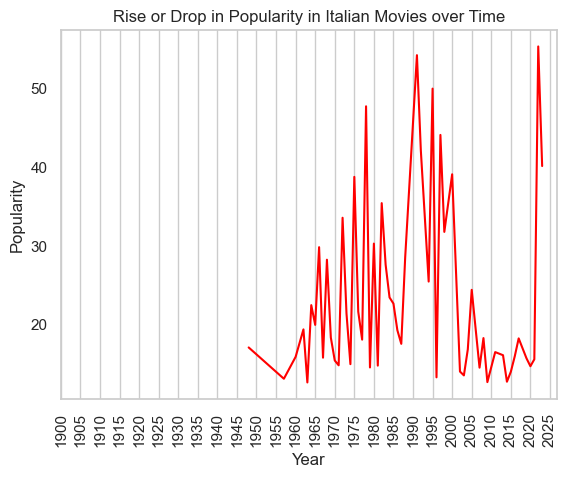

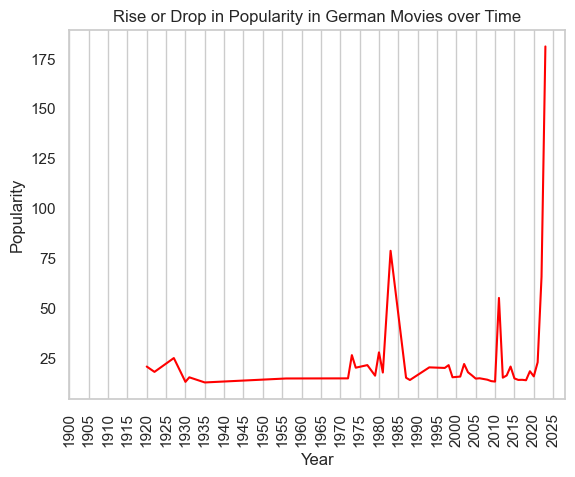

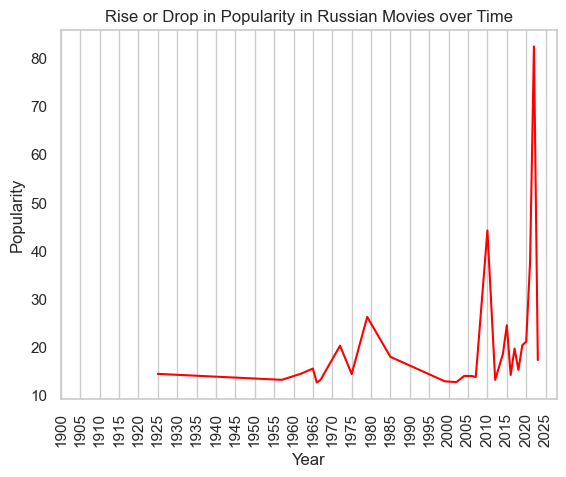

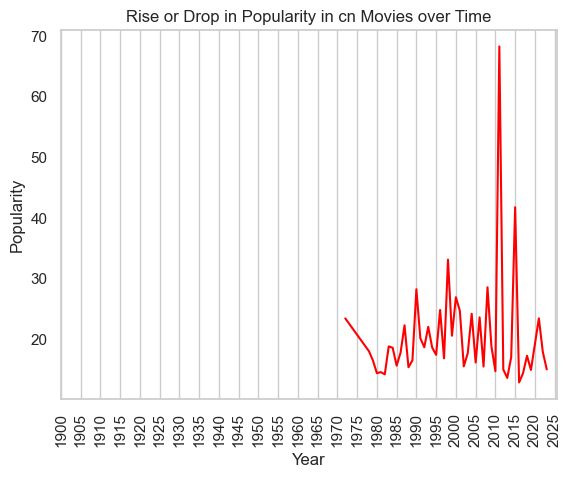

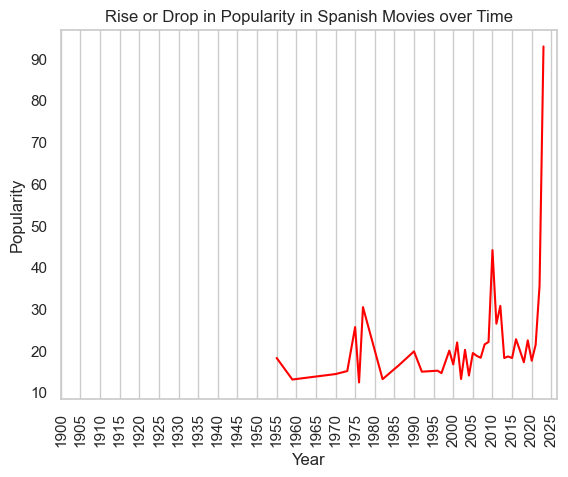

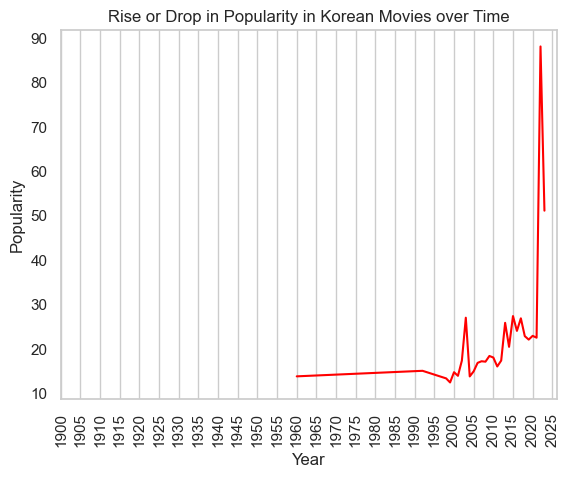

In [58]:
unique_lang = {"English","Japanese","Korean","French","Spanish","cn","Chinese","Italian","German","Russian"}
   
for language in unique_lang:
    movies = dataset[dataset['original_language'].str.contains(language)]
    avg_popularity = movies.groupby('release_year')['popularity'].mean()
    plt.plot(avg_popularity.index, avg_popularity.values, color='red')
    plt.title('Rise or Drop in Popularity in '+str(language)+' Movies over Time')
    plt.xlabel('Year')
    plt.ylabel('Popularity')
    plt.xticks(np.arange(1900, 2030, step=5),rotation=90)
    plt.grid(axis='y')
    plt.show()

In [59]:
top_fifty_data = dataset[dataset['vote_count'] > 100].sort_values('vote_average', ascending=False).head(50)
top_fifty_data

title release_date  \
6260             BTS: Permission to Dance on Stage - LA   2022-09-08   
3                   Spider-Man: Across the Spider-Verse   2023-05-31   
9927            Folklore: The Long Pond Studio Sessions   2020-11-25   
581                            The Shawshank Redemption   1994-09-23   
282                                       The Godfather   1972-03-14   
836                               The Godfather Part II   1974-12-20   
2668                        Dilwale Dulhania Le Jayenge   1995-10-19   
1220                                   Schindler's List   1993-12-15   
7443                                           Rubius X   2022-07-21   
1897               Teasing Master Takagi-san: The Movie   2022-06-10   
2419                                    Cinema Paradiso   1988-11-17   
1048                                         GoodFellas   1990-09-12   
441                                          Your Name.   2016-08-26   
3708                                   Cuando Sea Joven   2022-09-14   
2921                                      Seven Samurai   1954-04-26   
701                                        Forrest Gump   1994-06-23   
6325                           Dou kyu sei – Classmates   2016-02-20   
496                                      The Green Mile   1999-12-10   
742                                        Pulp Fiction   1994-09-10   
9037           David Attenborough: A Life on Our Planet   2020-09-28   
774                                            Parasite   2019-05-30   
1182                                  Life Is Beautiful   1997-12-20   
531       The Lord of the Rings: The Return of the King   2003-12-01   
1077                     The Good, the Bad and the Ugly   1966-12-23   
625                                       Spirited Away   2001-07-20   
430                                     The Dark Knight   2008-07-14   
1903              Lucy Shimmers And The Prince Of Peace   2020-10-19   
1856                                       12 Angry Men   1957-04-10   
892                                            Whiplash   2014-10-10   
4522                         Gabriel's Inferno: Part II   2020-07-31   
9461                          One Direction: This Is Us   2013-08-29   
2479                                        The Pianist   2002-09-17   
3305                                        Rear Window   1954-08-01   
423                                           Inception   2010-07-15   
5521                                              Ennio   2022-02-17   
4947                                   Sunset Boulevard   1950-08-10   
597                                Howl's Moving Castle   2004-09-09   
230                The Quintessential Quintuplets Movie   2022-05-20   
2888                      Josee, the Tiger and the Fish   2020-12-25   
1926     Neon Genesis Evangelion: The End of Evangelion   1997-07-19   
8016                                  The Legend of Hei   2019-08-27   
505               The Lord of the Rings: The Two Towers   2002-12-18   
1558                                 American History X   1998-07-01   
819                                               Se7en   1995-09-22   
2077                            The Empire Strikes Back   1980-05-20   
218                                        Interstellar   2014-11-05   
418   The Lord of the Rings: The Fellowship of the Ring   2001-12-18   
1286                                             Psycho   1960-06-22   
3853                                               Hope   2013-10-02   
1947                    One Flew Over the Cuckoo's Nest   1975-11-19   

                                                 genres original_language  \
6260                           ['Music', 'Documentary']            Korean   
3     ['Action', 'Adventure', 'Animation', 'Science ...           English   
9927                           ['Music', 'Documentary']           English   
581                                  ['Drama', 'Crime']           Eng

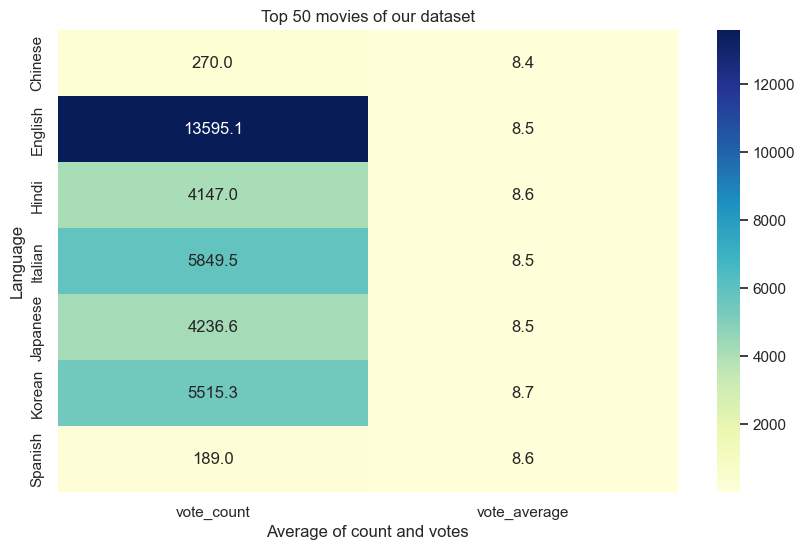

In [60]:

top_fifty = top_fifty_data.groupby('original_language')[['vote_count', 'vote_average']].mean()
plt.figure(figsize=(10, 6))

sns.heatmap(data=top_fifty, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Top 50 movies of our dataset')
plt.xlabel('Average of count and votes')
plt.ylabel('Language')
plt.show()

In [61]:
top_fifty_data_sorted =top_fifty_data.sort_values(by='vote_count', ascending=False)
top_fifty_data.head(5)

title release_date  \
6260   BTS: Permission to Dance on Stage - LA   2022-09-08   
3         Spider-Man: Across the Spider-Verse   2023-05-31   
9927  Folklore: The Long Pond Studio Sessions   2020-11-25   
581                  The Shawshank Redemption   1994-09-23   
282                             The Godfather   1972-03-14   

                                                 genres original_language  \
6260                           ['Music', 'Documentary']            Korean   
3     ['Action', 'Adventure', 'Animation', 'Science ...           English   
9927                           ['Music', 'Documentary']           English   
581                                  ['Drama', 'Crime']           English   
282                                  ['Drama', 'Crime']           English   

      vote_average  vote_count  popularity  \
6260           9.1         143      16.289   
3              8.8        1160    2859.047   
9927           8.7         116      12.354   
581            8.7       23935      69.056   
282            8.7       18076     110.377   

                                               overview     budget  \
6260  Purple colors the city of Los Angeles, as BTS ...          0   
3     After reuniting with Gwen Stacy, Brooklyn’s fu...  100000000   
9927  An intimate concert film, in which Taylor Swif...          0   
581   Framed in the 1940s for the double murder of h...   25000000   
282   Spanning the years 1945 to 1955, a chronicle o...    6000000   

                                   production_companies    revenue  runtime  \
6260                  ['HYBE', 'Big Hit Entertainment']          0      130   
3     ['Columbia Pictures', 'Sony Pictures Animation...  313522201      140   
9927  ['Taylor Swift Productions', 'Electric Light S...          0      106   
581                       ['Castle Rock Entertainment']   28341469      142   
282                 ['Paramount', 'Alfran Productions']  245066411      175   

                                                tagline  release_year  \
6260                                                NaN        2022.0   
3               It's how you wear the mask that matters        2023.0   
9927               Our coming of age has come and gone.        2020.0   
581   Fear can hold you prisoner. Hope can set you f...        1994.0   
282                          An offer you can't refuse.        1972.0   

                                                 target  
6260                                                NaN  
3     ['Action', 'Adventure', 'Animation', 'Science ...  
9927  ['Music', 'Documentary'] An intimate concert f...  
581   ['Drama', 'Crime'] Framed in the 1940s for the...  
282   ['Drama', 'Crime'] Spanning the years 1945 to ...

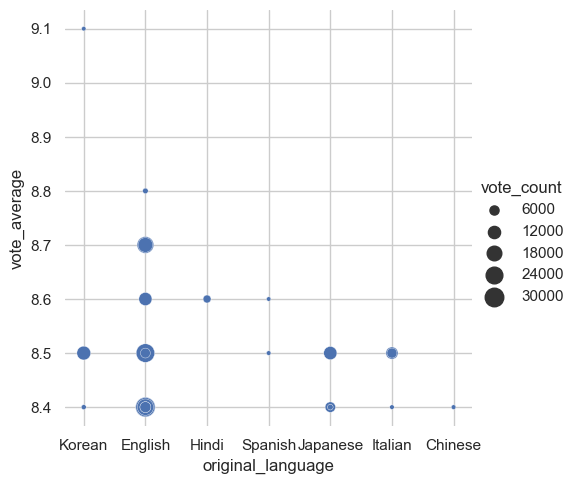

In [62]:

sns.set_theme(style="whitegrid")

# Load the example planets dataset
x_axis = list(range(1,31))

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=top_fifty_data,
    x="original_language", y="vote_average", size="vote_count",
    palette=cmap, sizes=(10, 200),
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [63]:
dataset.columns

Index(['title', 'release_date', 'genres', 'original_language', 'vote_average',
       'vote_count', 'popularity', 'overview', 'budget',
       'production_companies', 'revenue', 'runtime', 'tagline', 'release_year',
       'target'],
      dtype='object')

In [64]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [65]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

In [66]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\moi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [67]:
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')


In [68]:
words=dataset['genres'].dropna().apply(nltk.word_tokenize)

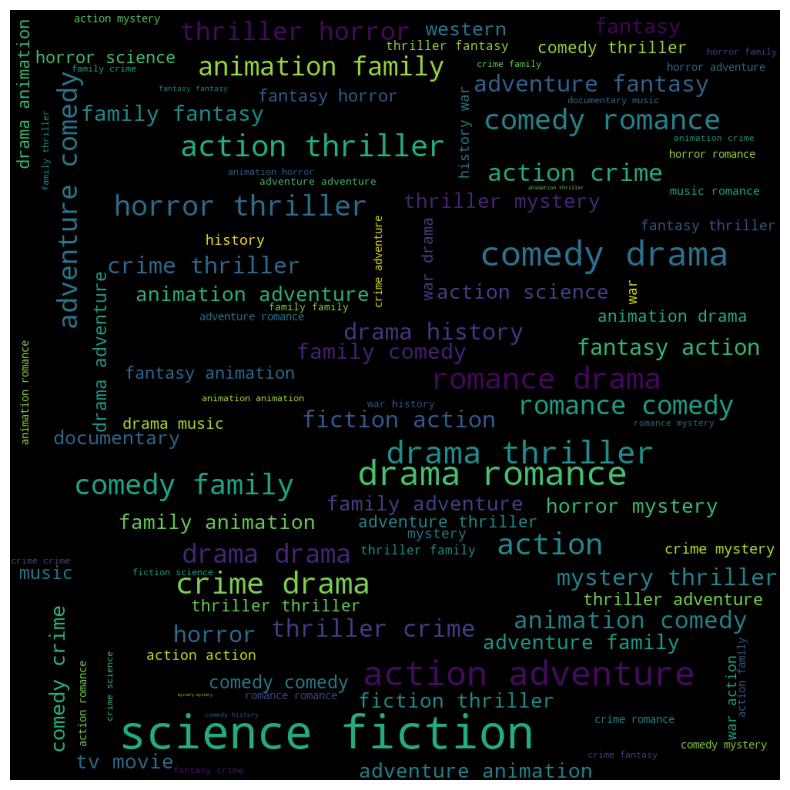

In [69]:
#un nuage de mots montrant les principaux mots-clés ou tags utilisés pour décrire les filmst

plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

words=dataset['genres'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

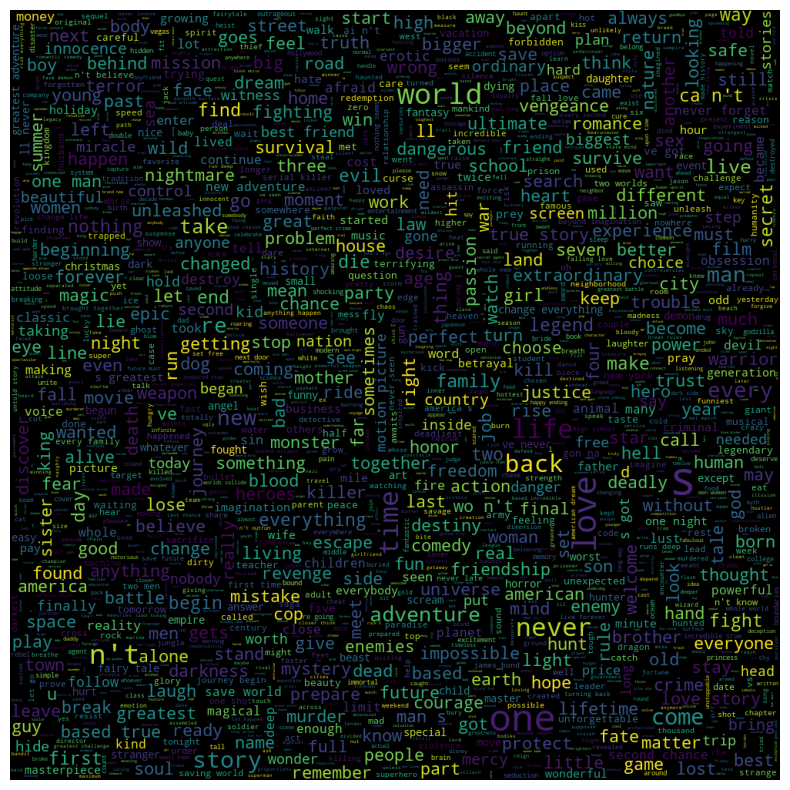

In [70]:
words=dataset['tagline'].dropna().apply(nltk.word_tokenize)

plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

words=dataset['tagline'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()